# Corpus size analysis
This notebook explores the effect of training corpus size on model performance.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
from os import listdir
import json
from ast import literal_eval
import numpy as np

In order to get the data visualizeds in this notebook, the following algorithm was used:

```
for model in models:
    initial_train = pick 150 random docs
    test = pick 30 random docs
    dev = pick 20 random docs
    for subset_num in range(7):
        train = initial_train + 50 more random docs
        train model
        evaluate model
```
Documents were sampled without replacement, and there are no overlaps between any sets.

 ## Loading the data

Read in the test performance files:

In [36]:
test_perf_prefix = '/mnt/home/lotrecks/Shiu_lab/pickle-corpus-code/data/straying_off_topic_data/corpus_size_analysis/performance/'
test_perf_paths = {
    'bioinfer': 'bioinfer_all_test_30_performance_with_types.jsonl',
    'chemprot': 'chemprot_all_test_30_performance_with_types.jsonl',
    'scierc': 'scierc_all_test_30_performance_with_types_and_specialized_template.jsonl',
    'genia': 'genia_all_test_30_performance_with_types_and_specialized_template.jsonl'
}
test_perf_dfs = {k: pd.read_csv(f'{test_perf_prefix}{v}') for k,v in test_perf_paths.items()}

Read in the reported validation scores:

In [37]:
def get_val_perfs(model_path, dset_name):
    """
    Get the reported mean validation F1 scores for a given set of models.

    parameters:
        model_path, str: path to models
        dset_name, str: name of dataset, should be substring at the beginning
            of the models of interest

    returns:
        val_perfs, df: rows are models, columns are ent and rel perfs
    """
    val_perfs_dict = {'model': [], 'ent_F1': [], 'rel_F1': []}
    for f in listdir(model_path):
        if dset_name in f and f.split('_')[-1].isdigit():
            val_perfs_dict['model'].append(f)
            with open(f'{model_path}/{f}/metrics.json') as myf:
                metric_json = json.load(myf)
            try:
                val_perfs_dict['ent_F1'].append(metric_json['best_validation__MEAN__ner_f1'])
            except KeyError:
                val_perfs_dict['ent_F1'].append(metric_json['best_validation_MEAN__ner_f1'])
            try:
                val_perfs_dict['rel_F1'].append(metric_json['best_validation_MEAN__relation_f1'])
            except KeyError:
                val_perfs_dict['rel_F1'].append(metric_json['best_validation__MEAN__relation_f1'])
    val_perfs = pd.DataFrame(val_perfs_dict)
    return val_perfs

In [38]:
model_path = '/mnt/home/lotrecks/Shiu_lab/dygiepp/models'
val_perf_dfs = {}
for dset_name in test_perf_paths.keys():
    val_perf_dfs[dset_name] = get_val_perfs(model_path, dset_name)

Check that those both look right:

In [39]:
test_perf_dfs['chemprot']

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI
0,chemprot_350.jsonl,chemprot_test_30.jsonl,0.872185,0.918025,0.894388,0.451285,0.511443,0.474469,"(0.8294314092953524, 0.9078621281464532)","(0.8805290559135455, 0.9458986779120128)","(0.8612794934689618, 0.9225690525690525)","(0.2536302211302211, 0.6893379987129985)","(0.39041501976284587, 0.6416171897087927)","(0.3184527063969382, 0.6420588235294117)"
1,chemprot_150.jsonl,chemprot_test_30.jsonl,0.856728,0.911898,0.883305,0.460430,0.335915,0.386003,"(0.7998069852941176, 0.9073709412897596)","(0.8771462578556466, 0.9410165020206556)","(0.842302220914119, 0.9194958177766202)","(0.2318354212159522, 0.6846398583049066)","(0.20063954303336137, 0.45195153533111354)","(0.22378447644618013, 0.5253271168596781)"
2,chemprot_200.jsonl,chemprot_test_30.jsonl,0.866952,0.896413,0.881278,0.487200,0.357844,0.408991,"(0.8181767270723247, 0.9071044289886784)","(0.8549075318286378, 0.9322876434068607)","(0.845490595171252, 0.9122093646166)","(0.26433529411764706, 0.7108585858585857)","(0.22453416149068323, 0.47034942182001005)","(0.24955808080808076, 0.5474235501791183)"
3,chemprot_450.jsonl,chemprot_test_30.jsonl,0.881913,0.921014,0.900924,0.501246,0.562073,0.526369,"(0.8456884549478795, 0.9158126151012891)","(0.8871669851037608, 0.9484605655218497)","(0.8736024298126219, 0.9257394310121888)","(0.2769858397698016, 0.7586734693877549)","(0.40363008090926605, 0.6766273899510894)","(0.3326248313090418, 0.7069373848987109)"
4,chemprot_500.jsonl,chemprot_test_30.jsonl,0.898902,0.936420,0.917155,0.564504,0.583075,0.571815,"(0.8589186507936507, 0.9355683542394387)","(0.9130905267995977, 0.9574417372881356)","(0.8896221284371737, 0.9396153030542613)","(0.3549202127659575, 0.7534852801519468)","(0.4198015873015873, 0.7137130801687763)","(0.402269647696477, 0.7226133833352865)"
5,chemprot_400.jsonl,chemprot_test_30.jsonl,0.889071,0.925920,0.907005,0.477718,0.482854,0.476188,"(0.8435195034367018, 0.9269895298423924)","(0.8940015142068228, 0.9490856520281595)","(0.8764020202020202, 0.9338068100970431)","(0.290315897104725, 0.6784018841204359)","(0.3808957510279771, 0.5899642707019757)","(0.33632075471698114, 0.5942236965457561)"
6,chemprot_300.jsonl,chemprot_test_30.jsonl,0.874491,0.924040,0.898440,0.466726,0.501797,0.478709,"(0.8334531013615735, 0.9163777952576024)","(0.8946704760268087, 0.9498523204541408)","(0.8691102498556939, 0.9269682034976152)","(0.28037090558766864, 0.6876664094153964)","(0.35461921010599684, 0.6153779069767442)","(0.32150126725752876, 0.6066849816849816)"
7,chemprot_250.jsonl,chemprot_test_30.jsonl,0.841263,0.932550,0.884373,0.395613,0.480059,0.431338,"(0.7941454916089884, 0.8853249546845973)","(0.9069179078924842, 0.954625533862111)","(0.8537631810665121, 0.9141259466298347)","(0.21010493491065685, 0.5731045081967212)","(0.30564875042793566, 0.662456115909724)","(0.254818268770923, 0.5934906392891034)"


In [40]:
val_perf_dfs['chemprot']

,model,ent_F1,rel_F1
0,chemprot_train_300,0.882943,0.445455
1,chemprot_train_250,0.896703,0.433628
2,chemprot_train_200,0.888143,0.380952
3,chemprot_train_450,0.899001,0.491228
4,chemprot_train_350,0.890147,0.465753
5,chemprot_train_400,0.889888,0.430493
6,chemprot_train_150,0.874025,0.337662
7,chemprot_train_500,0.903010,0.453782


Define a docnum column on each so that we can plot them:

In [41]:
for dset, df in test_perf_dfs.items():
    df['docnum'] = df['pred_file'].str.split('_').str[1].str[:-6].astype(int)
    test_perf_dfs[dset] = df.sort_values('docnum').reset_index(drop=True)
for dset, df in val_perf_dfs.items():
    df['docnum'] = df['model'].str.split('_').str[2].astype(int)
    val_perf_dfs[dset] = df.sort_values('docnum').reset_index(drop=True)

In [42]:
test_perf_dfs['chemprot']

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,docnum
0,chemprot_150.jsonl,chemprot_test_30.jsonl,0.856728,0.911898,0.883305,0.460430,0.335915,0.386003,"(0.7998069852941176, 0.9073709412897596)","(0.8771462578556466, 0.9410165020206556)","(0.842302220914119, 0.9194958177766202)","(0.2318354212159522, 0.6846398583049066)","(0.20063954303336137, 0.45195153533111354)","(0.22378447644618013, 0.5253271168596781)",150
1,chemprot_200.jsonl,chemprot_test_30.jsonl,0.866952,0.896413,0.881278,0.487200,0.357844,0.408991,"(0.8181767270723247, 0.9071044289886784)","(0.8549075318286378, 0.9322876434068607)","(0.845490595171252, 0.9122093646166)","(0.26433529411764706, 0.7108585858585857)","(0.22453416149068323, 0.47034942182001005)","(0.24955808080808076, 0.5474235501791183)",200
2,chemprot_250.jsonl,chemprot_test_30.jsonl,0.841263,0.932550,0.884373,0.395613,0.480059,0.431338,"(0.7941454916089884, 0.8853249546845973)","(0.9069179078924842, 0.954625533862111)","(0.8537631810665121, 0.9141259466298347)","(0.21010493491065685, 0.5731045081967212)","(0.30564875042793566, 0.662456115909724)","(0.254818268770923, 0.5934906392891034)",250
3,chemprot_300.jsonl,chemprot_test_30.jsonl,0.874491,0.924040,0.898440,0.466726,0.501797,0.478709,"(0.8334531013615735, 0.9163777952576024)","(0.8946704760268087, 0.9498523204541408)","(0.8691102498556939, 0.9269682034976152)","(0.28037090558766864, 0.6876664094153964)","(0.35461921010599684, 0.6153779069767442)","(0.32150126725752876, 0.6066849816849816)",300
4,chemprot_350.jsonl,chemprot_test_30.jsonl,0.872185,0.918025,0.894388,0.451285,0.511443,0.474469,"(0.8294314092953524, 0.9078621281464532)","(0.8805290559135455, 0.9458986779120128)","(0.8612794934689618, 0.9225690525690525)","(0.2536302211302211, 0.6893379987129985)","(0.39041501976284587, 0.6416171897087927)","(0.3184527063969382, 0.6420588235294117)",350
5,chemprot_400.jsonl,chemprot_test_30.jsonl,0.889071,0.925920,0.907005,0.477718,0.482854,0.476188,"(0.8435195034367018, 0.9269895298423924)","(0.8940015142068228, 0.9490856520281595)","(0.8764020202020202, 0.9338068100970431)","(0.290315897104725, 0.6784018841204359)","(0.3808957510279771, 0.5899642707019757)","(0.33632075471698114, 0.5942236965457561)",400
6,chemprot_450.jsonl,chemprot_test_30.jsonl,0.881913,0.921014,0.900924,0.501246,0.562073,0.526369,"(0.8456884549478795, 0.9158126151012891)","(0.8871669851037608, 0.9484605655218497)","(0.8736024298126219, 0.9257394310121888)","(0.2769858397698016, 0.7586734693877549)","(0.40363008090926605, 0.6766273899510894)","(0.3326248313090418, 0.7069373848987109)",450
7,chemprot_500.jsonl,chemprot_test_30.jsonl,0.898902,0.936420,0.917155,0.564504,0.583075,0.571815,"(0.8589186507936507, 0.9355683542394387)","(0.9130905267995977, 0.9574417372881356)","(0.8896221284371737, 0.9396153030542613)","(0.3549202127659575, 0.7534852801519468)","(0.4198015873015873, 0.7137130801687763)","(0.402269647696477, 0.7226133833352865)",500


In [43]:
test_perf_dfs['chemprot'][['rel_F1', 'rel_F1_CI', 'docnum']]

,rel_F1,rel_F1_CI,docnum
0,0.386003,"(0.22378447644618013, 0.5253271168596781)",150
1,0.408991,"(0.24955808080808076, 0.5474235501791183)",200
2,0.431338,"(0.254818268770923, 0.5934906392891034)",250
3,0.478709,"(0.32150126725752876, 0.6066849816849816)",300
4,0.474469,"(0.3184527063969382, 0.6420588235294117)",350
5,0.476188,"(0.33632075471698114, 0.5942236965457561)",400
6,0.526369,"(0.3326248313090418, 0.7069373848987109)",450
7,0.571815,"(0.402269647696477, 0.7226133833352865)",500


In [44]:
test_perf_dfs['genia']

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,docnum
0,genia_150.jsonl,genia_test_30.jsonl,0.805117,0.733237,0.767331,NaN,NaN,NaN,"(0.7665124546187979, 0.8373085649461146)","(0.689206008583691, 0.7715746525419892)","(0.7315162392836003, 0.7972016361862647)",NaN,NaN,NaN,150
1,genia_200.jsonl,genia_test_30.jsonl,0.802769,0.755112,0.777972,NaN,NaN,NaN,"(0.7669406298118766, 0.8330161395748459)","(0.7118950572141444, 0.7975531296851575)","(0.7499031365313653, 0.8040959296570632)",NaN,NaN,NaN,200
2,genia_250.jsonl,genia_test_30.jsonl,0.763058,0.791165,0.776716,NaN,NaN,NaN,"(0.71999878086625, 0.8035973332334299)","(0.7620294782402695, 0.821571788648245)","(0.7445848351766906, 0.8076925478117912)",NaN,NaN,NaN,250
3,genia_300.jsonl,genia_test_30.jsonl,0.768372,0.770290,0.769153,NaN,NaN,NaN,"(0.7232758620689655, 0.8141468002657427)","(0.7361966846578522, 0.8064559785434741)","(0.7326355760802966, 0.8018792538307794)",NaN,NaN,NaN,300
4,genia_350.jsonl,genia_test_30.jsonl,0.783549,0.796872,0.789947,NaN,NaN,NaN,"(0.7444488981744959, 0.8181314054030329)","(0.7540248655264599, 0.8382747042229801)","(0.7577000039755636, 0.8180148725874062)",NaN,NaN,NaN,350
5,genia_400.jsonl,genia_test_30.jsonl,0.796377,0.763275,0.779271,NaN,NaN,NaN,"(0.7548634651600753, 0.8319151059814169)","(0.7176049946445685, 0.8086777377494127)","(0.7453199369582348, 0.8134797953868859)",NaN,NaN,NaN,400
6,genia_450.jsonl,genia_test_30.jsonl,0.784457,0.780398,0.782233,NaN,NaN,NaN,"(0.747634340970025, 0.8211758435207823)","(0.7421161469344608, 0.819116925359507)","(0.7539267268264446, 0.8108725015179866)",NaN,NaN,NaN,450
7,genia_500.jsonl,genia_test_30.jsonl,0.785470,0.771696,0.778346,NaN,NaN,NaN,"(0.7443601083751693, 0.8230217545332879)","(0.7281441757670307, 0.8118894719307013)","(0.7413987276132331, 0.8077502431029104)",NaN,NaN,NaN,500


In [45]:
val_perf_dfs['chemprot']

,model,ent_F1,rel_F1,docnum
0,chemprot_train_150,0.874025,0.337662,150
1,chemprot_train_200,0.888143,0.380952,200
2,chemprot_train_250,0.896703,0.433628,250
3,chemprot_train_300,0.882943,0.445455,300
4,chemprot_train_350,0.890147,0.465753,350
5,chemprot_train_400,0.889888,0.430493,400
6,chemprot_train_450,0.899001,0.491228,450
7,chemprot_train_500,0.903010,0.453782,500


SciERC didn't have enough documents to do the 500 doc training set, so we need to add a phantom row to avoid issues when plotting:

In [46]:
test_perf_dfs['scierc'].loc[7] = ['scierc_500.jsonl', np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, '(0, 0)', '(0, 0)', '(0, 0)', '(0, 0)', 500]
val_perf_dfs['scierc'].loc[7] = ['scierc_train_500', np.nan, np.nan, 500]

In [47]:
test_perf_dfs['scierc']

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,docnum
0,scierc_150.jsonl,scierc_test_30.jsonl,0.601222,0.667921,0.632722,0.474809,0.379559,0.421167,"(0.5499417960088692, 0.6466189279731993)","(0.6169092348705797, 0.7120366251482799)","(0.5860580860580861, 0.6744735025970724)","(0.4015741430700447, 0.5557762609242016)","(0.30275299031706854, 0.45971997482919813)","(0.3542049106420364, 0.4916256157635467)",150
1,scierc_200.jsonl,scierc_test_30.jsonl,0.607107,0.629023,0.617721,0.446486,0.407309,0.425640,"(0.5493251049767685, 0.6536675471776396)","(0.5824461555629952, 0.6711603224818858)","(0.5702848454274814, 0.6588589365684981)","(0.36726323341836736, 0.5223412698412698)","(0.3401182572614108, 0.4786252896519056)","(0.3571727422351139, 0.4961418598853154)",200
2,scierc_250.jsonl,scierc_test_30.jsonl,0.638285,0.677824,0.657340,0.511777,0.404314,0.451256,"(0.5818523821645242, 0.6986245310092802)","(0.6323945635421045, 0.7254556368001746)","(0.6105678110921237, 0.7094137553575283)","(0.4118940631808279, 0.6137211134453782)","(0.325043771043771, 0.485362972508591)","(0.3674315936707754, 0.5346802935010482)",250
3,scierc_300.jsonl,scierc_test_30.jsonl,0.614603,0.665667,0.639030,0.461302,0.407809,0.432567,"(0.5718234737076648, 0.6593386627906976)","(0.630032399814181, 0.7047249278499279)","(0.602973628948007, 0.6798970677676498)","(0.3920893970893971, 0.52494781952216)","(0.3438086709486166, 0.4727735998416782)","(0.36859141791044775, 0.4951395581760114)",300
4,scierc_350.jsonl,scierc_test_30.jsonl,0.635154,0.657899,0.646211,0.481833,0.418920,0.447531,"(0.5746918502500338, 0.691326634550858)","(0.6106146980715574, 0.7032030755698213)","(0.5940926242504231, 0.6943297759119477)","(0.4107746863066012, 0.5544165515880844)","(0.3532081303859123, 0.4839954361883418)","(0.3838653746833575, 0.5075383611573595)",350
5,scierc_400.jsonl,scierc_test_30.jsonl,0.633315,0.686492,0.658735,0.465171,0.485128,0.474509,"(0.5746930432372506, 0.688616959983239)","(0.6378265895953757, 0.7313987063216857)","(0.6059331379777546, 0.7082427950594693)","(0.3945329584504842, 0.5384653662420382)","(0.4217930137495355, 0.5497783304498269)","(0.4111293842971435, 0.5353867283280053)",400
6,scierc_450.jsonl,scierc_test_30.jsonl,0.633302,0.685736,0.658402,0.494148,0.418293,0.452466,"(0.5723347290036191, 0.6908531073446328)","(0.6256095995893224, 0.7373487673020459)","(0.5994157315069466, 0.7112396912983915)","(0.40674645838603596, 0.5916225844231895)","(0.3561446356012795, 0.4830926326504644)","(0.38495453805136776, 0.5240320546684616)",450
7,scierc_500.jsonl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(0, 0)","(0, 0)","(0, 0)","(0, 0)",500


In [48]:
val_perf_dfs['scierc']

,model,ent_F1,rel_F1,docnum
0,scierc_train_150,0.582701,0.368601,150
1,scierc_train_200,0.534810,0.369942,200
2,scierc_train_250,0.580848,0.401384,250
3,scierc_train_300,0.595541,0.428094,300
4,scierc_train_350,0.594249,0.423841,350
5,scierc_train_400,0.579528,0.453674,400
6,scierc_train_450,0.572785,0.443686,450
7,scierc_train_500,NaN,NaN,500


Also have to change `NaN` to `(0, 0)` in the GENIA confidence interval columns to avoid an error from literal_eval:

In [49]:
rel_CI_cols = [c for c in test_perf_dfs['genia'].columns.values if ('rel_' in c) and ('_CI' in c)]
for c in rel_CI_cols:
    test_perf_dfs['genia'].loc[:, c] = '(0, 0)'
test_perf_dfs['genia']

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,docnum
0,genia_150.jsonl,genia_test_30.jsonl,0.805117,0.733237,0.767331,NaN,NaN,NaN,"(0.7665124546187979, 0.8373085649461146)","(0.689206008583691, 0.7715746525419892)","(0.7315162392836003, 0.7972016361862647)","(0, 0)","(0, 0)","(0, 0)",150
1,genia_200.jsonl,genia_test_30.jsonl,0.802769,0.755112,0.777972,NaN,NaN,NaN,"(0.7669406298118766, 0.8330161395748459)","(0.7118950572141444, 0.7975531296851575)","(0.7499031365313653, 0.8040959296570632)","(0, 0)","(0, 0)","(0, 0)",200
2,genia_250.jsonl,genia_test_30.jsonl,0.763058,0.791165,0.776716,NaN,NaN,NaN,"(0.71999878086625, 0.8035973332334299)","(0.7620294782402695, 0.821571788648245)","(0.7445848351766906, 0.8076925478117912)","(0, 0)","(0, 0)","(0, 0)",250
3,genia_300.jsonl,genia_test_30.jsonl,0.768372,0.770290,0.769153,NaN,NaN,NaN,"(0.7232758620689655, 0.8141468002657427)","(0.7361966846578522, 0.8064559785434741)","(0.7326355760802966, 0.8018792538307794)","(0, 0)","(0, 0)","(0, 0)",300
4,genia_350.jsonl,genia_test_30.jsonl,0.783549,0.796872,0.789947,NaN,NaN,NaN,"(0.7444488981744959, 0.8181314054030329)","(0.7540248655264599, 0.8382747042229801)","(0.7577000039755636, 0.8180148725874062)","(0, 0)","(0, 0)","(0, 0)",350
5,genia_400.jsonl,genia_test_30.jsonl,0.796377,0.763275,0.779271,NaN,NaN,NaN,"(0.7548634651600753, 0.8319151059814169)","(0.7176049946445685, 0.8086777377494127)","(0.7453199369582348, 0.8134797953868859)","(0, 0)","(0, 0)","(0, 0)",400
6,genia_450.jsonl,genia_test_30.jsonl,0.784457,0.780398,0.782233,NaN,NaN,NaN,"(0.747634340970025, 0.8211758435207823)","(0.7421161469344608, 0.819116925359507)","(0.7539267268264446, 0.8108725015179866)","(0, 0)","(0, 0)","(0, 0)",450
7,genia_500.jsonl,genia_test_30.jsonl,0.785470,0.771696,0.778346,NaN,NaN,NaN,"(0.7443601083751693, 0.8230217545332879)","(0.7281441757670307, 0.8118894719307013)","(0.7413987276132331, 0.8077502431029104)","(0, 0)","(0, 0)","(0, 0)",500


DyGIE++ puts a 0 instead of a `NaN` for performance when there is no relation capabilities, so we have to change those to `NaN` for GENIA so they don't show up on the plot:

In [50]:
val_perf_dfs['genia'].loc[:, 'rel_F1'] = np.nan
val_perf_dfs['genia']

,model,ent_F1,rel_F1,docnum
0,genia_train_150,0.789598,NaN,150
1,genia_train_200,0.826255,NaN,200
2,genia_train_250,0.830933,NaN,250
3,genia_train_300,0.835913,NaN,300
4,genia_train_350,0.836750,NaN,350
5,genia_train_400,0.837920,NaN,400
6,genia_train_450,0.835214,NaN,450
7,genia_train_500,0.831547,NaN,500


## Plot

Now, we need to `literal_eval` the confidence intervals on the test set and get them into a useable format, and then plot:

/mnt/home/lotrecks/anaconda3/envs/pickle/lib/python3.7/site-packages/matplotlib/axes/_axes.py:1148: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/mnt/home/lotrecks/anaconda3/envs/pickle/lib/python3.7/site-packages/matplotlib/axes/_axes.py:1149: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


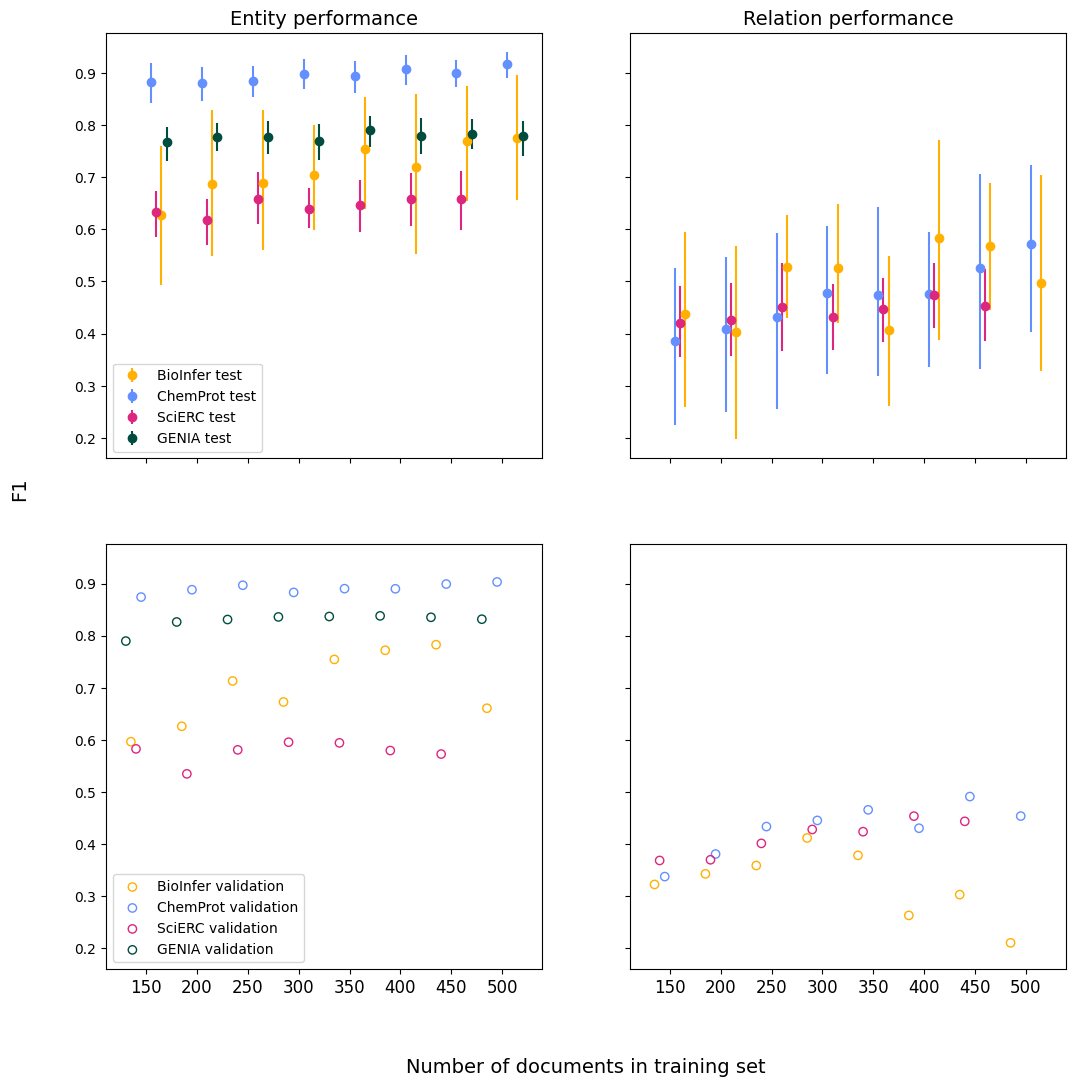

In [51]:
fig, axs = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(12, 12))

# Colors from the IBM palette
colors = {'chemprot': '#648FFF',
         'scierc': '#DC267F',
         'bioinfer': '#FFB000',
         'genia': '#004D40'}
offset = {'chemprot': 0.1,
         'scierc': 0.2,
         'bioinfer': 0.3,
         'genia': 0.4}
labels = {'chemprot': 'ChemProt',
         'scierc': 'SciERC',
         'bioinfer': 'BioInfer',
         'genia': 'GENIA'}

name_x = [150, 200, 250, 300, 350, 400, 450, 500]
x = np.arange(len(name_x))

for dset_name in test_perf_dfs.keys():
    # Get data for this dataset
    test_df = test_perf_dfs[dset_name]
    val_df = val_perf_dfs[dset_name]
    # Plot entity performance
    ent_CIs = test_df.ent_F1_CI.apply(lambda x: literal_eval(str(x)))
    ent_CIs = pd.DataFrame([[test_df['ent_F1'][i] - val[0] for i, val in enumerate(ent_CIs)], [val[1] - test_df['ent_F1'][i] for i, val in enumerate(ent_CIs)]])
    axs[0,0].errorbar(x + offset[dset_name], test_df['ent_F1'], yerr=ent_CIs.to_numpy(), fmt='o', color=colors[dset_name], label=f'{labels[dset_name]} test')   
    axs[1,0].scatter(x - offset[dset_name], val_df['ent_F1'], color=colors[dset_name], facecolor='none', label=f'{labels[dset_name]} validation')
    # Plot relation performance
    rel_CIs = test_df.rel_F1_CI.apply(lambda x: literal_eval(str(x)))
    rel_CIs = pd.DataFrame([[test_df['rel_F1'][i] - val[0] for i, val in enumerate(rel_CIs)], [val[1] - test_df['rel_F1'][i] for i, val in enumerate(rel_CIs)]])
    axs[0,1].errorbar(x + offset[dset_name], test_df['rel_F1'], yerr=rel_CIs.to_numpy(), fmt='o', color=colors[dset_name], label=f'{labels[dset_name]} test')
    axs[1,1].scatter(x - offset[dset_name], val_df['rel_F1'], color=colors[dset_name], facecolor='none', label=f'{labels[dset_name]} validation')
    
axs[0,0].set_xticks(x, name_x, size=12)
axs[0,1].set_xticks(x, name_x, size=12)
axs[1,0].set_xticks(x, name_x, size=12)
axs[1,1].set_xticks(x, name_x, size=12)
axs[0,0].set_title('Entity performance', size=14)
axs[0,1].set_title('Relation performance', size=14)
axs[0,0].legend(loc='lower left')
axs[1,0].legend(loc='lower left')
fig.supxlabel('Number of documents in training set', size=14)
fig.supylabel('F1', size=14)
fig.subplots_adjust(bottom=0.1, left=0.1)